# Network analysis

This notebook shows examples of how to perform network analysis on TF-COMB co-occurrence results.

## Load CombObj containing rules

First, we will load the data as created in the "select rules"-notebook.

In [1]:
import tfcomb
from tfcomb import CombObj
C = CombObj().from_pickle("../data/GM12878_selected.pkl")

In [2]:
C

<CombObj: 83705 TFBS (151 unique names) | Market basket analysis: 283 rules>

## Visualize network

We can now use the CombObj to directly visualize the network. The first time the function is run, the .network attribute will be created within the CombObj:

INFO: Finished! The network is found within <CombObj>.network.


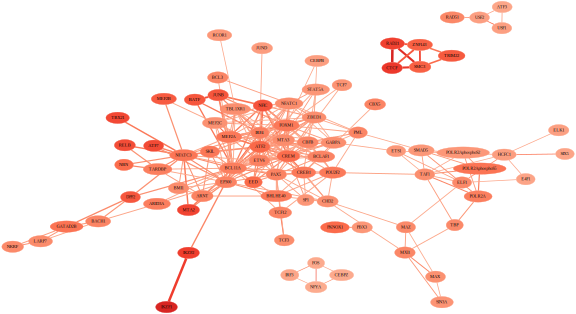

In [3]:
C.plot_network()

By default, the nodes are colored by count of binding sites, and edges are colored by the 'cosine' score. However, this is easily adjusted via the 'color_<edge/node>\_by' parameters:

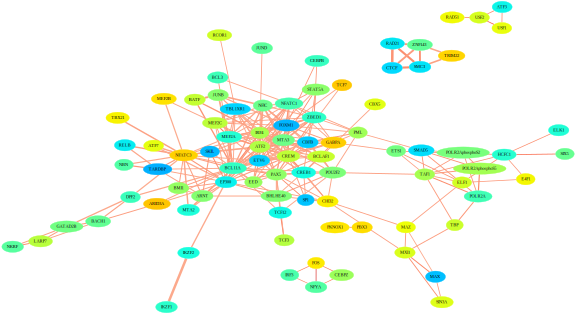

In [4]:
C.plot_network(color_node_by="TF1", color_edge_by="zscore")

## Different network layouts

It is possible to change the network layout via the "engine" parameter of plot_network:

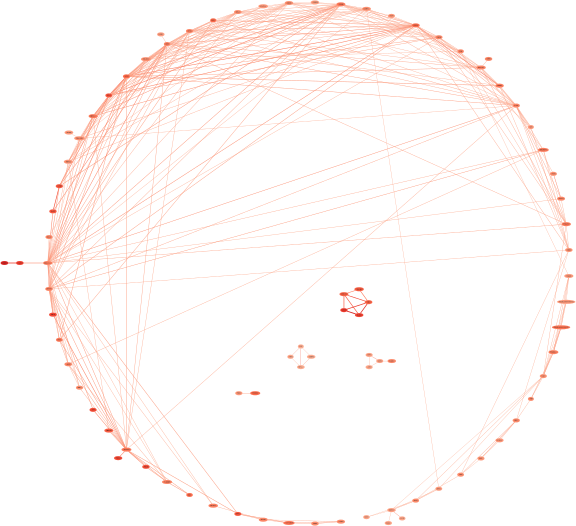

In [5]:
C.plot_network(engine="circo")

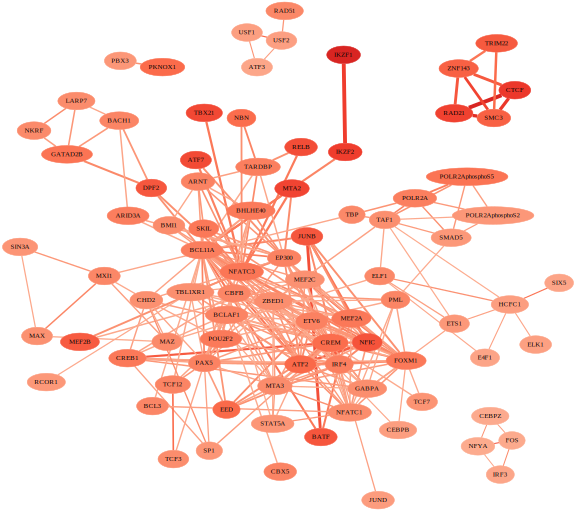

In [6]:
C.plot_network(engine="fdp")

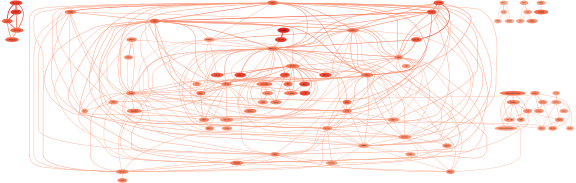

In [7]:
C.plot_network(engine="dot", size_node_by="TF1_count")

In [8]:
#The available layouts are:
import graphviz; graphviz.ENGINES

{'circo', 'dot', 'fdp', 'neato', 'osage', 'patchwork', 'sfdp', 'twopi'}

## Cluster network nodes

It is often of interest to partition individual TFs into groups of highly connected TFs (highly co-occurring). This is possible using the _partition_network()_ function. Below we show different settings for performing TF clustering based on co-occurring networks.

### Using louvain clustering (default)

The default partition_network uses louvain clustering of the python-louvain package (https://github.com/taynaud/python-louvain):

In [9]:
C.partition_network()

INFO: Added 'partition' attribute to the network attributes


The partition was added to the network attributs as well as to the internal .TF_table of the CombObj:

In [10]:
C.TF_table

,TF1,TF1_count,TF1_support,TF2,TF2_count,TF2_support,partition
RAD21,RAD21,2241,0.019989,RAD21,2241,0.019989,1
CTCF,CTCF,2432,0.021693,CTCF,2432,0.021693,1
SMC3,SMC3,1638,0.014611,SMC3,1638,0.014611,1
IKZF1,IKZF1,2922,0.026064,IKZF1,2922,0.026064,8
IKZF2,IKZF2,2324,0.020730,IKZF2,2324,0.020730,8
...,...,...,...,...,...,...,...
ELK1,ELK1,237,0.002114,ELK1,237,0.002114,9
CEBPB,CEBPB,273,0.002435,CEBPB,273,0.002435,4
RCOR1,RCOR1,415,0.003702,RCOR1,415,0.003702,4
TCF7,TCF7,512,0.004567,TCF7,512,0.004567,4


This enables plotting of the partition using plot_network:

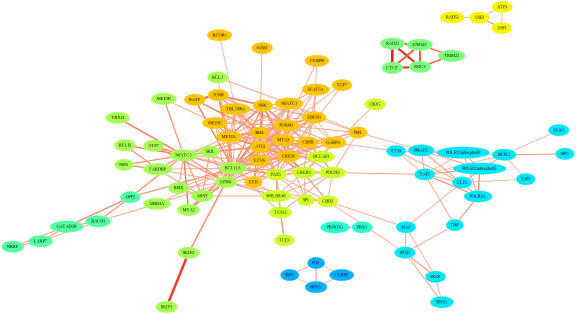

In [11]:
C.plot_network(color_node_by="partition")

### Louvain clustering with weights

Louvain clustering can also work with weighted edges, as seen here for cosine:

In [12]:
C.partition_network(weight="cosine")

INFO: Added 'partition' attribute to the network attributes


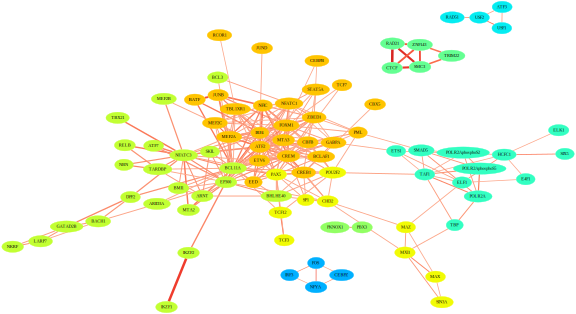

In [13]:
C.plot_network(color_node_by="partition")

### Using block model

The third option is using the graph-tool 'minimize.minimize_blockmodel_dl'-function (https://graph-tool.skewed.de/static/doc/inference.html#graph_tool.inference.minimize.minimize_blockmodel_dl):

In [14]:
C.partition_network(method="blockmodel")

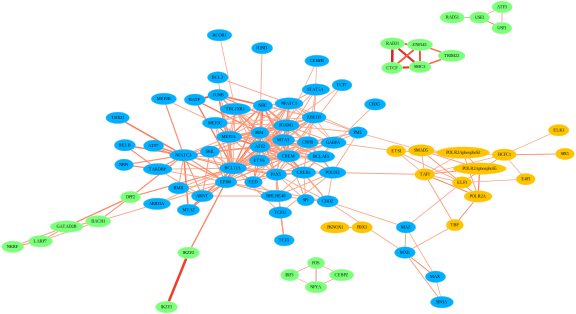

In [15]:
C.plot_network(color_node_by="partition")